In [1]:
import pandas as pd



In [2]:
# Load dataset
data = pd.read_csv("/content/AB_Testing Dataset.csv")  # Replace with the actual file name
#/content/AB_Testing Dataset.csv
# Explore the dataset
print(data.info())
print(data.head())

# Check unique values for location_country to identify groups
print(data['location_country'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   location_country  320 non-null    object
 1   day               320 non-null    int64 
 2   absent factor     320 non-null    object
 3   total_visitors    320 non-null    int64 
 4   total_carts       320 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 12.6+ KB
None
  location_country  day            absent factor  total_visitors  total_carts
0    United States    1  All factors are present               1            0
1    United States    1  All factors are present               1            0
2     Saudi Arabia    1  All factors are present               4            1
3     Saudi Arabia    1  All factors are present              10            4
4     Saudi Arabia    1  All factors are present               1            1
['United States' 'Saudi Arabia' 'Germany' 'Oman' '

In [3]:
# Add CCR column
data['cart_conversion_rate'] = (data['total_carts'] / data['total_visitors']) * 100

# Handle missing values (if any)
data.dropna(inplace=True)

# Ensure no zero visitors
data = data[data['total_visitors'] > 0]

# View updated data
print(data.head())


  location_country  day            absent factor  total_visitors  total_carts  \
0    United States    1  All factors are present               1            0   
1    United States    1  All factors are present               1            0   
2     Saudi Arabia    1  All factors are present               4            1   
3     Saudi Arabia    1  All factors are present              10            4   
4     Saudi Arabia    1  All factors are present               1            1   

   cart_conversion_rate  
0                   0.0  
1                   0.0  
2                  25.0  
3                  40.0  
4                 100.0  


In [4]:
from scipy.stats import ttest_ind

# Split data into two groups based on location_country
group_a = data[data['location_country'] == 'Country A']['cart_conversion_rate']
group_b = data[data['location_country'] == 'Country B']['cart_conversion_rate']

# Perform t-test
t_stat, p_value = ttest_ind(group_a, group_b)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Significant difference in cart conversion rates between the two groups.")
else:
    print("No significant difference in cart conversion rates between the two groups.")


T-statistic: nan, P-value: nan
No significant difference in cart conversion rates between the two groups.


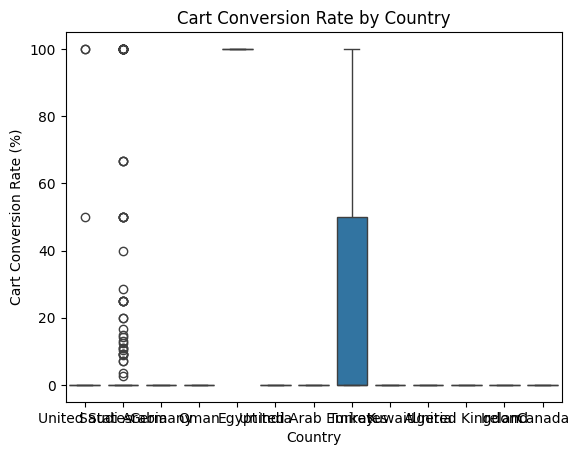

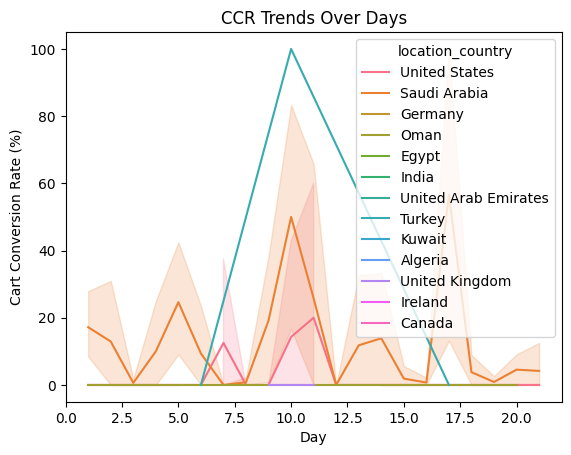

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for CCR by location_country
sns.boxplot(x='location_country', y='cart_conversion_rate', data=data)
plt.title('Cart Conversion Rate by Country')
plt.xlabel('Country')
plt.ylabel('Cart Conversion Rate (%)')
plt.show()

# Line plot for CCR trends over days
sns.lineplot(x='day', y='cart_conversion_rate', hue='location_country', data=data)
plt.title('CCR Trends Over Days')
plt.xlabel('Day')
plt.ylabel('Cart Conversion Rate (%)')
plt.show()


In [6]:
from scipy.stats import ttest_ind

# Assume `group_a` and `group_b` contain CCR values for Group A and Group B
t_stat, p_value = ttest_ind(group_a, group_b)

# Print results
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: nan, P-value: nan


In [7]:
group_a = group_a.dropna()
group_b = group_b.dropna()


In [8]:
print(group_a.var())
print(group_b.var())


nan
nan


In [9]:
# Check the contents of the groups
print("Group A:\n", group_a)
print("Group B:\n", group_b)


Group A:
 Series([], Name: cart_conversion_rate, dtype: float64)
Group B:
 Series([], Name: cart_conversion_rate, dtype: float64)


In [10]:
# Display unique values in location_country
print(data['location_country'].unique())


['United States' 'Saudi Arabia' 'Germany' 'Oman' 'Egypt' 'India'
 'United Arab Emirates' 'Turkey' 'Kuwait' 'Algeria' 'United Kingdom'
 'Ireland' 'Canada']


In [11]:
# Standardize location_country column
data['location_country'] = data['location_country'].str.strip().str.lower()

# Check unique values again
print(data['location_country'].unique())


['united states' 'saudi arabia' 'germany' 'oman' 'egypt' 'india'
 'united arab emirates' 'turkey' 'kuwait' 'algeria' 'united kingdom'
 'ireland' 'canada']


In [12]:
# Replace 'country_a' and 'country_b' with actual values from your dataset
group_a = data[data['location_country'] == 'country_a']['cart_conversion_rate']
group_b = data[data['location_country'] == 'country_b']['cart_conversion_rate']

# Verify group sizes
print(f"Group A size: {len(group_a)}, Group B size: {len(group_b)}")


Group A size: 0, Group B size: 0


In [13]:
print(data[data['location_country'].isnull()])


Empty DataFrame
Columns: [location_country, day, absent factor, total_visitors, total_carts, cart_conversion_rate]
Index: []


In [14]:
# Overall CCR statistics
mean_ccr = data['cart_conversion_rate'].mean()
print(f"Mean Cart Conversion Rate: {mean_ccr}")


Mean Cart Conversion Rate: 10.294792914244013


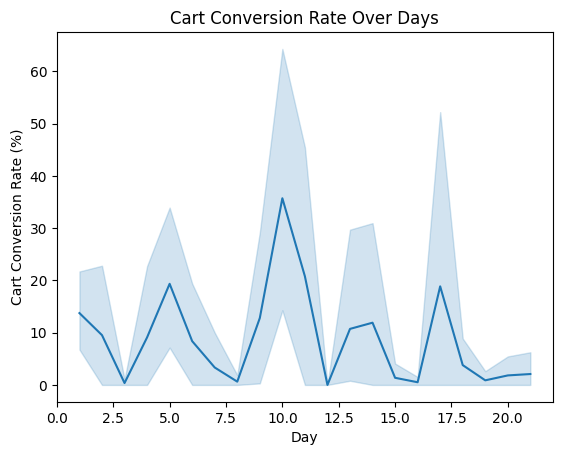

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Trend of CCR over days
sns.lineplot(x='day', y='cart_conversion_rate', data=data)
plt.title('Cart Conversion Rate Over Days')
plt.xlabel('Day')
plt.ylabel('Cart Conversion Rate (%)')
plt.show()


In [16]:
# Define groups based on two countries
group_a = data[data['location_country'] == 'united states']['cart_conversion_rate']
group_b = data[data['location_country'] == 'saudi arabia']['cart_conversion_rate']

# Check group sizes
print(f"Group A size: {len(group_a)}, Group B size: {len(group_b)}")


Group A size: 71, Group B size: 232


In [17]:
# Create a region column
region_mapping = {
    'united states': 'North America',
    'canada': 'North America',
    'saudi arabia': 'Middle East',
    'oman': 'Middle East',
    'egypt': 'Middle East',
    'united arab emirates': 'Middle East',
    'kuwait': 'Middle East',
    'india': 'Asia',
    'turkey': 'Europe',
    'germany': 'Europe',
    'united kingdom': 'Europe',
    'ireland': 'Europe',
    'algeria': 'Africa'
}
data['region'] = data['location_country'].map(region_mapping)

# Define groups by region
group_a = data[data['region'] == 'North America']['cart_conversion_rate']
group_b = data[data['region'] == 'Middle East']['cart_conversion_rate']

# Check group sizes
print(f"Group A size: {len(group_a)}, Group B size: {len(group_b)}")


Group A size: 72, Group B size: 238


In [18]:
from scipy.stats import ttest_ind

# Perform t-test
t_stat, p_value = ttest_ind(group_a, group_b, nan_policy='omit')  # Ignore NaN values
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in cart conversion rates between the two groups.")
else:
    print("No significant difference in cart conversion rates.")


T-statistic: -2.4252759370741495, P-value: 0.0158713843557241
Significant difference in cart conversion rates between the two groups.


In [19]:
# Example: Mean CCR per day
daily_ccr = data.groupby('day')['cart_conversion_rate'].mean()
print(daily_ccr)


day
1     13.743961
2      9.523810
3      0.357143
4      9.090909
5     19.345238
6      8.373206
7      3.333333
8      0.625000
9     12.797619
10    35.714286
11    20.779221
12     0.000000
13    10.719494
14    11.904762
15     1.363636
16     0.510204
17    18.859649
18     3.793103
19     0.877193
20     1.818182
21     2.083333
Name: cart_conversion_rate, dtype: float64


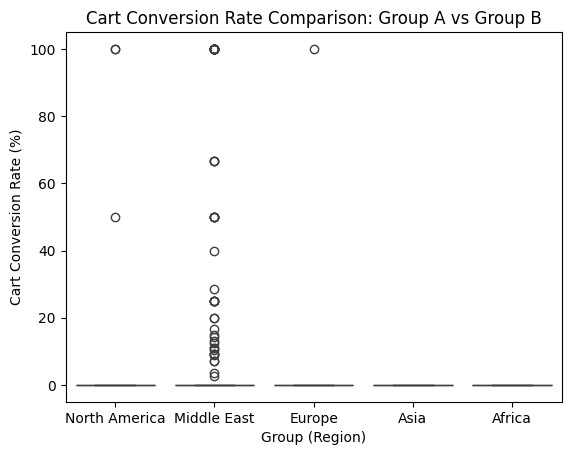

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for cart conversion rate by group
sns.boxplot(x=data['region'], y=data['cart_conversion_rate'])
plt.title('Cart Conversion Rate Comparison: Group A vs Group B')
plt.xlabel('Group (Region)')
plt.ylabel('Cart Conversion Rate (%)')
plt.show()


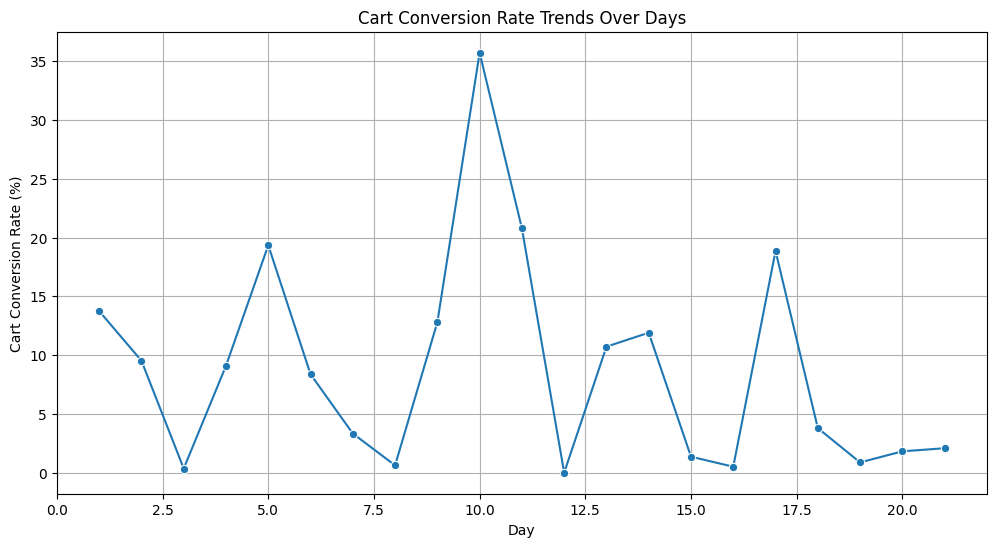

In [21]:
# Daily CCR trends
daily_ccr = data.groupby('day')['cart_conversion_rate'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_ccr.index, y=daily_ccr.values, marker='o')
plt.title('Cart Conversion Rate Trends Over Days')
plt.xlabel('Day')
plt.ylabel('Cart Conversion Rate (%)')
plt.grid()
plt.show()


<ipython-input-22-2076ba45557a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_days.index, y=top_days.values, palette='Blues_d')


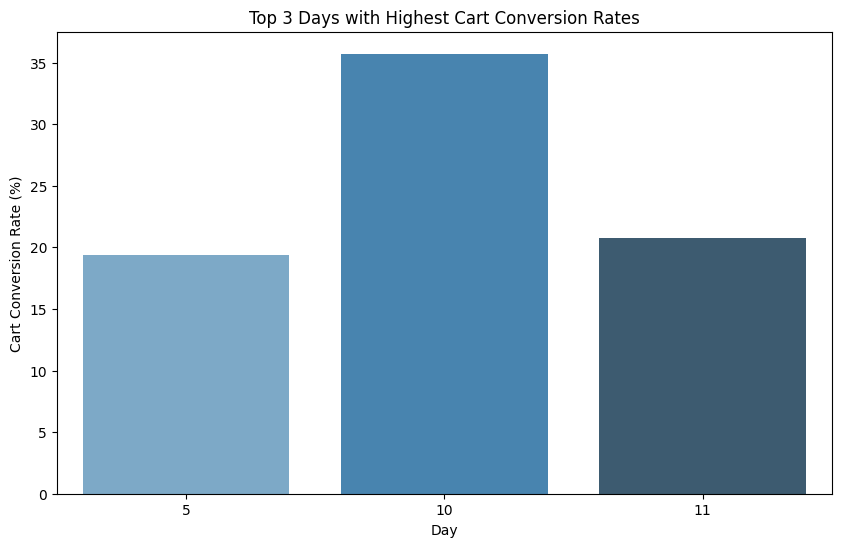

<ipython-input-22-2076ba45557a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_days.index, y=bottom_days.values, palette='Reds_d')


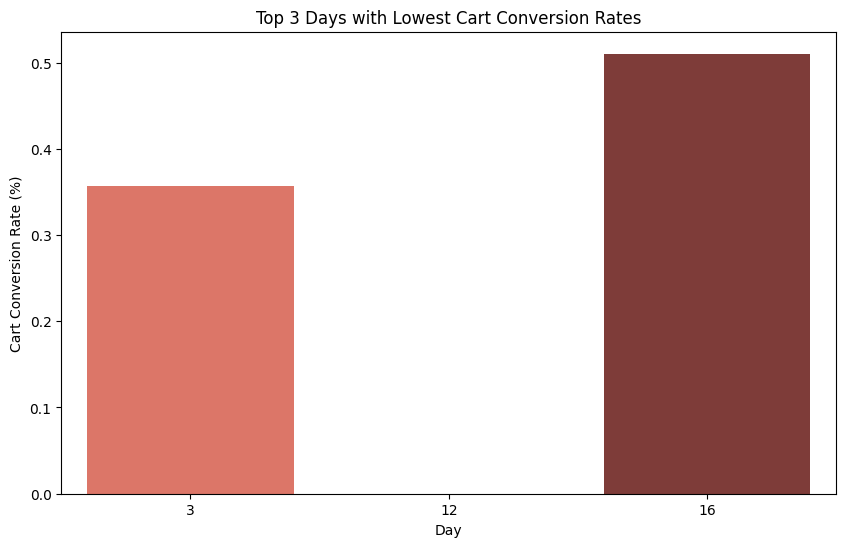

In [22]:
# Highlight days with the highest and lowest CCR
top_days = daily_ccr.nlargest(3)  # Top 3 days
bottom_days = daily_ccr.nsmallest(3)  # Bottom 3 days

plt.figure(figsize=(10, 6))
sns.barplot(x=top_days.index, y=top_days.values, palette='Blues_d')
plt.title('Top 3 Days with Highest Cart Conversion Rates')
plt.xlabel('Day')
plt.ylabel('Cart Conversion Rate (%)')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_days.index, y=bottom_days.values, palette='Reds_d')
plt.title('Top 3 Days with Lowest Cart Conversion Rates')
plt.xlabel('Day')
plt.ylabel('Cart Conversion Rate (%)')
plt.show()
